In [2]:
import pandas as pd
import numpy as np

from numpy import NaN,nan,NAN
from pandas import DataFrame

import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [9]:
tips['sex_str']=tips['sex'].astype('str')
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [26]:
tsm = tips.head(10)
tsm.loc[[1,3,5,7], 'total_bill'] = 'missing'
tsm.dtypes

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [30]:
# 문자를 포함한 열은 숫자로 변경이 불가능

# tsm['total_bill'].astype(float)
# pd.to_numeric(tsm['total_bill'])

# 문자는 무시하고 숫자형으로 변경하는 옵션
tsm['total_bill'] = pd.to_numeric(tsm['total_bill'], errors='coerce')
# coerce : 문자형은 NaN값으로 대체됨
# raise (default) : 
tsm.dtypes


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [35]:
tips['sex']=tips['sex'].astype('str')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
sex_str       244 non-null object
dtypes: category(3), float64(2), int64(1), object(2)
memory usage: 10.7+ KB


In [36]:
tips['sex']=tips['sex'].astype('category')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
sex_str       244 non-null object
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 9.2+ KB


In [43]:
word = 'hello'
sent = 'world'

sent[-1]
sent[0:3]
sent[2:-1]

word[::2]

'hlo'

In [88]:
# 첫번째 글자를 대문자로 변경해주는 함수
'Hello World'.capitalize()

'Hello World'.count('o')

# ~ 으로 시작하는시 boolean
'Hello World'.startswith('Hello')
'Hello World'.endswith('World')

# 처음으로 ~문자가 나오는 인덱스 출력
'Hello World'.find('l')
'Hello World'.index('l')
'Hello World'.find('z') # 못찾으면 -1 출력
# 'Hello World'.index('z')  # 못찾으면 error

# 알파벳으로만 구성되어있는가 ?
'Hello World'.isalpha()
'HelloWorld'.isalpha()

# 10진 숫자로만 구성되어있는가?
'110'.isdecimal()

# 대, 소문자로 변경
'Hello World'.lower()
'Hello World'.upper()

# 앞단어를 뒤단어로 대체
'Hello World'.replace('Hello','Hi')

# 양쪽에 존재하는 공백 제거
'  Hello World   '.strip()

'Hi Hi Hi'.split(sep=' ')

'9'.zfill(5)

'00009'

In [95]:
# join : 문자열 연결
d1 = '40'
d2 = '50'
d3 = '60'
d4 = 'Number'

' '.join([d1,d2,d3,d4])

'40 50 60 Number'

In [97]:
# splitlines : 여러줄로 구성된 문자열을 분리
mystr = '''
A : Hello
B : Hi
A : How are you?
B : Fine
'''
mystr

'\nA : Hello\nB : Hi\nA : How are you?\nB : Fine\n'

In [99]:
msr = mystr.splitlines()
msr

['', 'A : Hello', 'B : Hi', 'A : How are you?', 'B : Fine']

In [108]:
mystr.replace('B :', ' ').splitlines()

['', 'A : Hello', '  Hi', 'A : How are you?', '  Fine']

In [109]:
a = 'hi'
s = 'hello {}'
s.format(a)

'hello hi'

In [115]:
myhome = 'location : {lat}, {lon}'
myhome.format(lat = '36', lon = 125)

'location : 36, 125'

In [118]:
s = '%d digits of pi' % 3
s

'3 digits of pi'

In [127]:
# % 뒤에 변수 이름을 주면 % 딕셔너리 형태로 포매팅
print('some digits of %(co)s: %(val).2f'%{'co':'e','val':3.3113})

some digits of e: 3.31


In [130]:
# apply 메서ㄷ
df = DataFrame({
    'a':[1,2,3], 
    'b':[2,3,4]
})
df

,a,b
0,1,2
1,2,3
2,3,4


In [131]:
def my_sq(x):
    return x**2
def my_exp(x,n):
    return x**n

In [142]:
df['a'].apply(my_sq)
df['a'].apply(my_exp, n=3)

0     1
1     8
2    27
Name: a, dtype: int64

In [143]:
def print_me(x):
    print(x)

In [148]:
df.apply(print_me, axis=1)  # axis = 0 (default)

a    1
b    2
Name: 0, dtype: int64
a    2
b    3
Name: 1, dtype: int64
a    3
b    4
Name: 2, dtype: int64


0    None
1    None
2    None
dtype: object

In [156]:
def myavg(a,y,z):
    return (x+y+z)/3
def myavg_apply(data):
    x = data[0]
    y = data[1]
    z = data[2]
    return (x+y+z)/3

In [157]:
df.apply(myavg_apply)

a    2.0
b    3.0
dtype: float64

In [162]:
def myavg_apply2(data):
    sum = 0
    for item in data:
        sum += item
    return sum/df.shape[0]

In [161]:
df.apply(myavg_apply2)

1
3
6
2
5
9


a    2.0
b    3.0
dtype: float64

In [170]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
titanic.isnull().sum(axis=1)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

In [192]:
def count_missing(data):
    # 누락값 개수 리턴
    return data.isnull().sum()

def prop_count_missing(vec):
    # 누락값 개수 리턴
    vm = vec.size
    nc =  count_missing(vec)
    return nc/vm

def prop_complete(vec):
    return 1 - prop_count_missing(vec)

In [193]:
cm = titanic.apply(count_missing)
print(cm)

pm = titanic.apply(prop_count_missing)
print(pm)

pcm = titanic.apply(prop_complete)
pcm

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


PassengerId    1.000000
Survived       1.000000
Pclass         1.000000
Name           1.000000
Sex            1.000000
Age            0.801347
SibSp          1.000000
Parch          1.000000
Ticket         1.000000
Fare           1.000000
Cabin          0.228956
Embarked       0.997755
dtype: float64

In [202]:
# 행방향으로 누락값의 개수/비율 조사
cmr = titanic.apply(count_missing, axis=1)
pmr = titanic.apply(prop_count_missing, axis=1)
pcmr = titanic.apply(prop_complete, axis=1)

In [208]:
titanic['num_missing'] = titanic.apply(count_missing, axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,num_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [210]:
titanic[titanic['num_missing']>1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,num_missing
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,2
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,2
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,2
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,2
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,2
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,2
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,2
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,2


In [259]:
name2010 = pd.read_csv('names/yob2010.txt', names=['name','sex','births'])

In [245]:
# 데이터 건 수 확인
name2010.info()
name2010.shape[0]
name2010.tail(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33838 entries, 0 to 33837
Data columns (total 3 columns):
name      33838 non-null object
sex       33838 non-null object
births    33838 non-null int64
dtypes: int64(1), object(2)
memory usage: 793.2+ KB


,name,sex,births
33837,Zzyzx,M,5


In [258]:
# 성별을 기준으로 birth의 합계를 출력
name2010.pivot_table(index='sex', values='births', aggfunc='sum')
name2010.groupby('sex')[['births']].sum()

,births
sex,
F,1759010
M,1898382


In [551]:
# 파일 여러개 한 번에 읽기
# 데이터프레임들을 리스트에 담아서 읽어드리고 concat으로 하나의 데이터프레임으로 합친다.
pieces=[]

for year in range(1880,2011):
    path = 'names/yob%d.txt' % year
    df = pd.read_csv(path, names=['name','sex','births'])
    df['year'] = year
    pieces.append(df)
    
names = pd.concat(pieces, ignore_index = True)

In [285]:
# names.head(20)
# names[:20]

# 행 year, 열 sex, 데이터 births의 합계
total_births = names.pivot_table(index='year', columns='sex', values='births', aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


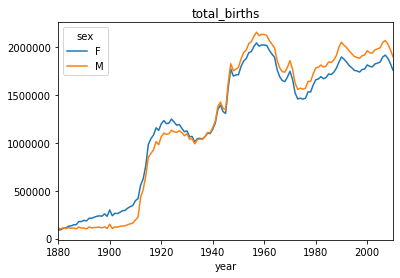

In [287]:
# 시각화
total_births.plot(title = 'total_births')

In [531]:
# 각 연도별 이름의 비율
def add_prop(group):
    # 구현
    births = group['births'].sum()
    group['prop'] = group['births']/births
    return group
# pt = names.groupby(['year','sex'])[['births']].sum()
# pt
# name['prop'] = names.groupby(['year','sex']).apply(add_prop)
names2 = names.groupby(['year','sex']).apply(add_prop)

In [362]:
a = names2[names2['year']==1881]
a[a['sex']=='F']['prop'].sum()

1.0

In [359]:
np.allclose(names2.groupby(['year','sex']).prop.sum(),1)

True

In [532]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

grouped = names2.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)

In [542]:
girls = top1000[top1000.sex=='F']
boys = top1000[top1000.sex=='M']
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [534]:
df = boys[boys.year==2010]

prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()

prop_cumsum[:10]
# df[df['prop'].cumsum()<0.5]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [535]:
# 누적합이 0.5인 지점까지 이름 종류의 개수
prop_cumsum.searchsorted(0.5)

116

In [543]:
total_births = top1000.pivot_table('births',index = 'year', columns='name', aggfunc='sum')
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


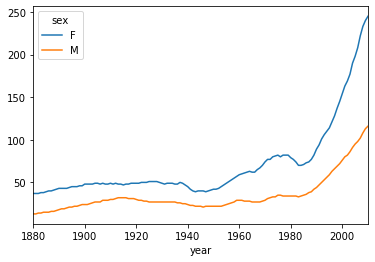

In [546]:
# 년도별 성별 이름의 가짓수

def get_qc(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)

res = top1000.groupby(['year','sex']).apply(get_qc)
res=res.unstack('sex')
res.plot()

1900 1950 2010년 성별로 구분
이름을 구성하는 알파벳 문자 비율 조사
ex)
1900년 남자 아이들 이름
john 

,,name
year,sex,
2010,M,jacobethanmichaeljaydenwilliamalexandernoahdan...


In [552]:
df = pd.concat([names[names['year']==1900],names[names['year']==1950],names[names['year']==2010]], ignore_index=True)
df

,name,sex,births,year
0,Mary,F,16710,1900
1,Helen,F,6343,1900
2,Anna,F,6115,1900
3,Margaret,F,5305,1900
4,Ruth,F,4765,1900
...,...,...,...,...
47866,Zymaire,M,5,2010
47867,Zyonne,M,5,2010
47868,Zyquarius,M,5,2010
47869,Zyran,M,5,2010


In [662]:
df.pivot_table(index = ['year','sex'],columns='name', values=['births'])

births                                                              \
name      Aaban Aadam Aadan  Aaden Aadhav Aadhavan Aadhya  Aadi Aadil Aadin   
year sex                                                                      
1900 F      NaN   NaN   NaN    NaN    NaN      NaN    NaN   NaN   NaN   NaN   
     M      NaN   NaN   NaN    NaN    NaN      NaN    NaN   NaN   NaN   NaN   
1950 F      NaN   NaN   NaN    NaN    NaN      NaN    NaN   NaN   NaN   NaN   
     M      NaN   NaN   NaN    NaN    NaN      NaN    NaN   NaN   NaN   NaN   
2010 F      NaN   NaN   NaN    NaN    NaN      NaN   19.0   NaN   NaN   NaN   
     M      9.0   7.0  11.0  448.0   13.0      5.0    NaN  54.0  11.0  18.0   

          ...                                                                  \
name      ... Zyriah Zyriana Zyrihanna Zyrion Zyriyah Zyron Zyshawn Zytavious   
year sex  ...                                                                   
1900 F    ...    NaN     NaN       NaN    NaN     NaN   NaN     NaN       NaN   
     M    ...    NaN     NaN       NaN    NaN     NaN   NaN     NaN       NaN   
1950 F    ...    NaN     NaN       NaN    NaN     NaN   NaN     NaN       NaN   
     M    ...    NaN     NaN       NaN    NaN     NaN   NaN     NaN       NaN   
2010 F    ...   29.0     5.0       5.0    NaN     6.0   NaN     NaN       NaN   
     M    ...    NaN     NaN       NaN   13.0     NaN   7.0     9.0       6.0   

                        
name     Zyyanna Zzyzx  
year sex                
1900 F       NaN   NaN  
     M       NaN   NaN  
1950 F       NaN   NaN  
     M       NaN   NaN  
2010 F       6.0   NaN  
     M       NaN   5.0  

[6 rows x 36127 columns]

In [553]:
namelist = df.groupby(['year','sex'])[['name']].sum()
namelist['name'] = namelist['name'].apply(str.lower)
namelist

name
year sex                                                   
1900 F    maryhelenannamargaretruthelizabethflorenceethe...
     M    johnwilliamjamesgeorgecharlesrobertjosephfrank...
1950 F    lindamarypatriciabarbarasusannancydeborahsandr...
     M    jamesrobertjohnmichaeldavidwilliamrichardthoma...
2010 F    isabellasophiaemmaoliviaavaemilyabigailmadison...
     M    jacobethanmichaeljaydenwilliamalexandernoahdan...

In [637]:
def count_alpha(name):
    alpha_cnt={}
    
    alpha_cnt[name.count('a')]='a'
    alpha_cnt[name.count('b')]='b'
    alpha_cnt[name.count('c')]='c'
    alpha_cnt[name.count('d')]='d'
    alpha_cnt[name.count('e')]='e'
    alpha_cnt[name.count('f')]='f'
    alpha_cnt[name.count('g')]='g'
    alpha_cnt[name.count('h')]='h'
    alpha_cnt[name.count('i')]='i'
    alpha_cnt[name.count('j')]='j'
    alpha_cnt[name.count('k')]='k'
    alpha_cnt[name.count('l')]='l'
    alpha_cnt[name.count('m')]='m'
    alpha_cnt[name.count('n')]='n'
    alpha_cnt[name.count('o')]='o'
    alpha_cnt[name.count('p')]='p'
    alpha_cnt[name.count('q')]='q'
    alpha_cnt[name.count('r')]='r'
    alpha_cnt[name.count('s')]='s'
    alpha_cnt[name.count('t')]='t'
    alpha_cnt[name.count('u')]='u'
    alpha_cnt[name.count('v')]='v'
    alpha_cnt[name.count('w')]='w'
    alpha_cnt[name.count('x')]='x'
    alpha_cnt[name.count('y')]='y'
    alpha_cnt[name.count('z')]='z'

    alpha_cnt[max(alpha_cnt.keys())]
    return alpha_cnt[max(alpha_cnt.keys())]

In [638]:
maxname = namelist['name'].apply(count_alpha)
maxname

year  sex
1900  F      e
      M      e
1950  F      e
      M      e
2010  F      a
      M      a
Name: name, dtype: object

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [715]:
key[0][0]

1

In [717]:
key[key==1]

array([1])

In [5]:
key = np.array(
    [[1,2,3],
    [4,5,6],
    [7,8,9]])

pw = '2 8 4 6'
row = []
col = []

row_valid = 0
col_valid = 0

for i in pw.split(' '):
    a = str(np.where(key==int(i)))
    row.append(a[8])
    col.append(a[33])
for i in range(int(len(row))-1):
    if abs(int(row[int(i)+1])-int(row[i])) > 1:
        row_valid += 1
for i in range(int(len(col))-1):
    if abs(int(col[int(i)+1])-int(col[i])) > 1:
        col_valid += 1
        
if row_valid == 1 or col_valid == 1:
    print(False)
else :
    print(True)

False


In [740]:
a = str(np.where(key==9))
print(a[8])
print(a[33])

2
2


In [719]:
np.where(key==2)

(array([0], dtype=int64), array([1], dtype=int64))